In [1]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model

# getting the pretrained model 
from keras.applications.vgg16 import VGG16,preprocess_input  #xception 

from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from glob import glob


In [2]:
vgg=VGG16(input_shape=[100,100,3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [3]:
x=Flatten()(vgg.output)

x=Dense(4,activation='sigmoid')(x)  #x,y,w,h

In [4]:
model=Model(vgg.input,x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [6]:
def image_generator(batch_size=64):
  while True:
    for _ in range(50):#50 batches per epoch 
      
      
      X=np.zeros((batch_size,100,100,3))
      Y=np.zeros((batch_size,4))

      for i in range(batch_size):
        
        row0=np.random.randint(90)
        col0=np.random.randint(90)
        row1=np.random.randint(row0,100)
        col1=np.random.randint(col0,100)

        X[i,row0:row1,col0:col1,:]=1

        Y[i,0]=row0/100.
        Y[i,1]=col0/100.
        Y[i,2]=(row1-row0)/100.
        Y[i,3]=(col1-col0)/100.
      
      yield X,Y



In [7]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001))

In [8]:
hist=model.fit(image_generator(),steps_per_epoch=50,epochs=5)

Epoch 1/5
50/50 [==============================] - 22s 178ms/step - loss: 0.0514
Epoch 2/5
50/50 [==============================] - 9s 179ms/step - loss: 0.0073
Epoch 3/5
50/50 [==============================] - 9s 180ms/step - loss: 0.0042
Epoch 4/5
50/50 [==============================] - 9s 181ms/step - loss: 0.0036
Epoch 5/5
50/50 [==============================] - 9s 183ms/step - loss: 0.0037


In [9]:
def make_pred():
  x=np.zeros((100,100,3))
  row0=np.random.randint(90)
  col0=np.random.randint(90)
  row1=np.random.randint(row0,100)
  col1=np.random.randint(col0,100)

  x[row0:row1,col0:col1,:]=1

  print(row0,col0,row1,col1)

  X=np.expand_dims(x,0)
  p=model.predict(X)[0]
  print(p)
  fig,ax=plt.subplots(1)
  ax.imshow(x)
  rect=Rectangle(
      (p[1]*100,p[0]*100),  #important 
      p[3]*100,p[2]*100,
      linewidth=1,
      edgecolor='r',
      facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()



18 14 44 55
1/1 [==============================] - 0s 474ms/step
[0.1833635  0.15665057 0.24441756 0.40055338]


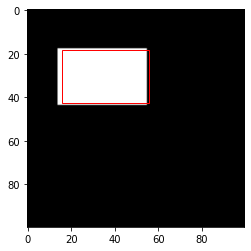

In [10]:
make_pred()